After adding bias,X is:
[[ 1. 25.  1.]
 [ 1. 30.  3.]
 [ 1. 47.  2.]
 [ 1. 32.  5.]
 [ 1. 43. 10.]
 [ 1. 51.  7.]
 [ 1. 28.  5.]
 [ 1. 33.  4.]
 [ 1. 37.  5.]
 [ 1. 39.  8.]
 [ 1. 29.  1.]
 [ 1. 47.  9.]
 [ 1. 54.  5.]
 [ 1. 51.  4.]
 [ 1. 44. 12.]
 [ 1. 41.  6.]
 [ 1. 58. 17.]
 [ 1. 23.  1.]
 [ 1. 44.  9.]
 [ 1. 37. 10.]]
Weights are (intercepts,slope): [31261.68985409   -99.19535546  2162.40419192]
Predictions: [30944.2101595  34773.04176604 30924.31653128 38899.45943897
 48620.33148852 41339.55606906 39296.24086081 36637.85989158
 38403.48266166 44692.30452651 30547.42873765 46061.14587475
 36717.16161883 34852.34349329 52845.9445169  40169.10543174
 62269.23050007 31142.60087042 46358.73194113 49215.50362128]


Text(0, 0.5, 'predicted')

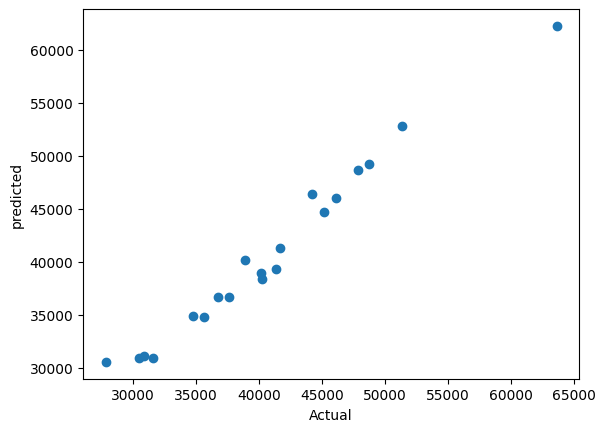

In [13]:
# Multiple Linear Regression 
#Equation => w=(X^T X)^-1 X^T Y
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class LinearRegression:
    def __init__(self):
        self.w=None
    def fit(self,X,Y):
        X=np.array(X)
        Y=np.array(Y).reshape((-1,1))

        X2=np.hstack([np.ones((X.shape[0],1)),X])
        print("After adding bias,X is:")
        print(X2)

        sum_matrix=np.zeros((X2.shape[1],X2.shape[1]))
        for x in X2:
            sum_matrix+=np.outer(x,x)

        XTX=sum_matrix
        XTX_inverse=np.linalg.pinv(XTX)

        XTY=X2.T.dot(Y)

        self.w=XTX_inverse.dot(XTY)
        print("Weights are (intercepts,slope):",self.w.flatten())

    def predict(self,X):
        X=np.array(X)
        X_=np.hstack([np.ones((X.shape[0],1)),X])
        return X_.dot(self.w)

df=pd.read_csv("multiple_linear_regression_dataset.csv")
X=df.drop(['income'],axis=1)
Y=df['income'].values
#X=np.array([[4,8],[2,3],[3,9],[6,9]])
#Y=np.array([11,8,23,56])

LR=LinearRegression()
weights=LR.fit(X,Y)

predictions=LR.predict(X)
print("Predictions:",predictions.flatten())

plt.scatter(Y,predictions)
plt.xlabel('Actual')
plt.ylabel('predicted')
        